Data taken from https://transparencia.unicamp.br/paginas/consultar-salarios-do-mes-atual/

In [224]:
from numpy.core.fromnumeric import mean
import pandas as pd #dataframe
import numpy as np#dataframe
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the data

In [225]:
data_original = pd.read_csv('consultar-salarios.csv',sep=';')
print(data_original.shape)
data = data_original.drop_duplicates()[0:2000]
print(data.shape)

(14137, 12)
(2000, 12)


## Data cleaning

In [226]:
data['Salário Bruto Nominal'] = data['Salário Bruto Nominal'].str.replace('.','')
data['Salário Bruto Nominal'] = data['Salário Bruto Nominal'].str.replace(',','.')
data['Salário Bruto Nominal'] = data['Salário Bruto Nominal'].str[3:]

data['Indenizações'] = data['Indenizações'].str.replace('.','')
data['Indenizações'] = data['Indenizações'].str.replace(',','.')
data['Indenizações'] = data['Indenizações'].str[3:]

data['Redutor'] = data['Redutor'].str.replace('.','')
data['Redutor'] = data['Redutor'].str.replace(',','.')
data['Redutor'] = data['Redutor'].str[3:]

data['Descontos'] = data['Descontos'].str.replace('.','')
data['Descontos'] = data['Descontos'].str.replace(',','.')
data['Descontos'] = data['Descontos'].str[3:]

data['Líquido'] = data['Líquido'].str.replace('.','')
data['Líquido'] = data['Líquido'].str.replace(',','.')
data['Líquido'] = data['Líquido'].str[3:]

data['Férias e 13o Salário'] = data['Férias e 13o Salário'].str.replace('.','')
data['Férias e 13o Salário'] = data['Férias e 13o Salário'].str.replace(',','.')
data['Férias e 13o Salário'] = data['Férias e 13o Salário'].str[3:]

data['Salário Bruto Efetivo'] = data['Salário Bruto Efetivo'].str.replace('.','')
data['Salário Bruto Efetivo'] = data['Salário Bruto Efetivo'].str.replace(',','.')
data['Salário Bruto Efetivo'] = data['Salário Bruto Efetivo'].str[3:]

In [227]:
data["Salário Bruto Nominal"] = pd.to_numeric(data["Salário Bruto Nominal"])
data["Indenizações"] = pd.to_numeric(data["Indenizações"])
data["Redutor"] = pd.to_numeric(data["Redutor"])
data["Descontos"] = pd.to_numeric(data["Descontos"])
data["Líquido"] = pd.to_numeric(data["Líquido"])
data["Férias e 13o Salário"] = pd.to_numeric(data["Férias e 13o Salário"])
data["Salário Bruto Efetivo"] = pd.to_numeric(data["Salário Bruto Efetivo"])
#data.dtypes

In [228]:
data[['Cargo1','Cargo2']] = data['Cargo'].str.split(pat=' / ',expand=True)
for i in range(0,data['Cargo'].size):
    if (data['Cargo2'].loc[i] is None): 
        data['Cargo2'].loc[i]=data['Cargo1'].loc[i]
        data['Cargo1'].loc[i]=None

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Matrícula,Nome,Cargo,Referência,Salário Bruto Nominal,Indenizações,Redutor,Descontos,Líquido,Férias e 13o Salário,Lotação,Salário Bruto Efetivo,Cargo1,Cargo2
0,1651,DERCIO TABOSSI,PR ASS ADMINISTRATIVOS / Técnico em administração,M2A,10186.69,0.0,0.0,2303.08,7883.61,0.0,01.14.16.04 REITORIA/PREFEITURA GABINETE/COORD...,10186.69,PR ASS ADMINISTRATIVOS,Técnico em administração
1,1678,RAUL DOS SANTOS,PR APOIO TEC SERVICOS / Técnico gráfico,M1A,7360.50,0.0,0.0,3615.89,3744.61,0.0,"10.10 INSTITUTO DE MATEMATICA, ESTATISTICA E C...",7360.50,PR APOIO TEC SERVICOS,Técnico gráfico
2,1686,EDUARDO BRAGA,Técnico Administrativo,24,4250.66,0.0,0.0,2835.92,1414.74,0.0,01.12.12 REITORIA/DIRETORIA GERAL DE ADMINISTR...,4250.66,None,Técnico Administrativo
3,10022,BERENICE FERREIRA,Atendente de Enfermagem,16,2659.49,0.0,0.0,255.40,2404.09,0.0,27.09.15.02 HOSPITAL DA MULHER PROF.DR.JOSE AR...,2659.49,None,Atendente de Enfermagem
4,13960,LIDIA TEREZINHA FERREIRA,PAEPE APOSENTADO / Prof Assuntos Admin,S1A,11739.72,0.0,0.0,2962.46,8777.26,0.0,26 INSTITUTO DE ECONOMIA,11739.72,PAEPE APOSENTADO,Prof Assuntos Admin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,25704,MARIA DE FATIMA RIDOLFI O PIRES DA SILVA,PR TECNOLOGIA INFO COM / Analista de suporte c...,S5A,29133.99,0.0,6085.4,7384.23,15664.36,0.0,01.02 REITORIA/COORDENADORIA GERAL DA UNIVERSI...,23048.59,PR TECNOLOGIA INFO COM,Analista de suporte computacional
1996,25712,MARIA HELENA DE SOUZA LIMA MARTINEZ,PR TECNOLOGIA INFO COM / Analista de Desenvolv...,S4D,19824.27,0.0,0.0,6123.51,13700.76,0.0,20.01 CENTRO DE COMPUTACAO/ASSESSORIA DE PLANE...,19824.27,PR TECNOLOGIA INFO COM,Analista de Desenvolv de Sistemas
1997,25747,MARIA JOSE PILOTO JOIA,Professor Magistério Secundário Técnico III,M,18182.50,0.0,0.0,2585.31,15597.19,0.0,13 COLEGIO TECNICO DE LIMEIRA,18182.50,None,Professor Magistério Secundário Técnico III
1998,25763,MARIA OSORIA FERREIRA,PR ASS ADMINISTRATIVOS / Administrativo auxiliar,F1C,4786.90,0.0,0.0,512.75,4274.15,0.0,15 HOSPITAL DE CLINICAS,4786.90,PR ASS ADMINISTRATIVOS,Administrativo auxiliar


## Ploting some graphs

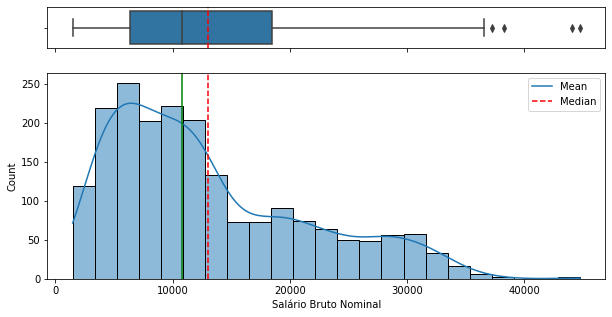

<Figure size 432x288 with 0 Axes>

In [229]:
f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(10,5))

mean=data['Salário Bruto Nominal'].mean()
median=data['Salário Bruto Nominal'].median()

sns.boxplot(x=data['Salário Bruto Nominal'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')

sns.histplot(data=data['Salário Bruto Nominal'],ax=ax_hist,kde=True)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

plt.savefig("Figures/salaries.jpeg")

In [230]:
#split the column in each category and sub-category
df = data['Lotação'].str.split(pat='/', expand=True) 
df.columns = ['cat_1','cat_2','cat_3','cat_4','cat_5','cat_6','cat_7'] #change every expenditure category column name
df.insert(loc=0, column='cat_0',value=None)
df[['cat_0','cat_1']] = df['cat_1'].str.split(pat=' ', expand=True,n=1)
df['Salário Bruto Nominal'] = pd.to_numeric(data['Salário Bruto Nominal']) #convert to numeric

### Plotting the 10 biggest expenses in salaries

[Text(0.5, 0, 'Standard deviation')]

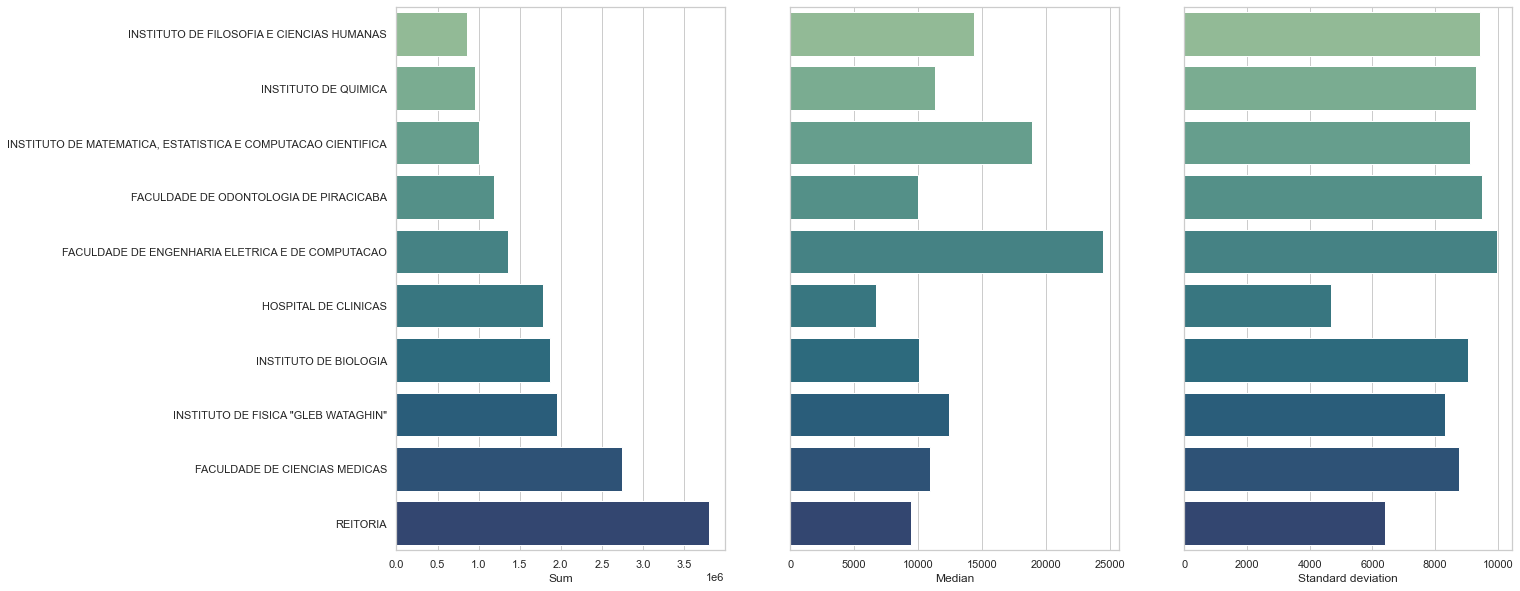

In [319]:
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(1,3,sharey=True, figsize=(20,10))

df1 = df.groupby('cat_1').sum().sort_values('Salário Bruto Nominal').reset_index()
df2 = df.groupby('cat_1').median().reset_index()
df3 = df.groupby('cat_1').std().reset_index()


fig1 = sns.barplot(x='Salário Bruto Nominal', y='cat_1', data=df1, order=df1['cat_1'][-10:], palette='crest', ax=axs[0])
fig2 = sns.barplot(x='Salário Bruto Nominal', y='cat_1', data=df2, order=df1['cat_1'][-10:], palette='crest', ax=axs[1])
fig3 = sns.barplot(x='Salário Bruto Nominal', y='cat_1', data=df3, order=df1['cat_1'][-10:], palette='crest', ax=axs[2])

fig1.set(ylabel='')
fig2.set(ylabel='')
fig3.set(ylabel='')

fig1.set(xlabel='Sum')
fig2.set(xlabel='Median')
fig3.set(xlabel='Standard deviation')

### Plotting the 10 biggest median salaries

[Text(0.5, 0, 'Standard deviation')]

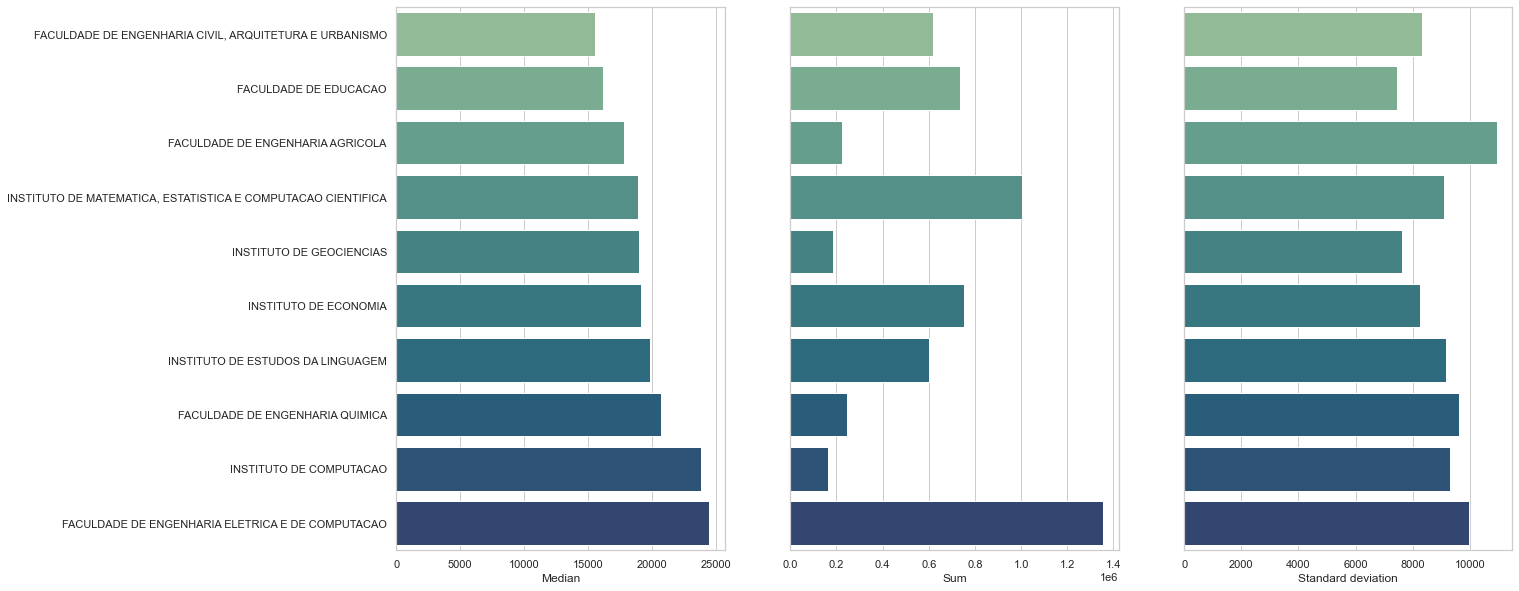

In [321]:
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(1,3,sharey=True, figsize=(20,10))

df1 = df.groupby('cat_1').median().sort_values('Salário Bruto Nominal').reset_index()
df2 = df.groupby('cat_1').sum().reset_index()
df3 = df.groupby('cat_1').std().reset_index()


fig1 = sns.barplot(x='Salário Bruto Nominal', y='cat_1', data=df1, order=df1['cat_1'][-10:], palette='crest', ax=axs[0])
fig2 = sns.barplot(x='Salário Bruto Nominal', y='cat_1', data=df2, order=df1['cat_1'][-10:], palette='crest', ax=axs[1])
fig3 = sns.barplot(x='Salário Bruto Nominal', y='cat_1', data=df3, order=df1['cat_1'][-10:], palette='crest', ax=axs[2])

fig1.set(ylabel='')
fig2.set(ylabel='')
fig3.set(ylabel='')

fig1.set(xlabel='Median')
fig2.set(xlabel='Sum')
fig3.set(xlabel='Standard deviation')

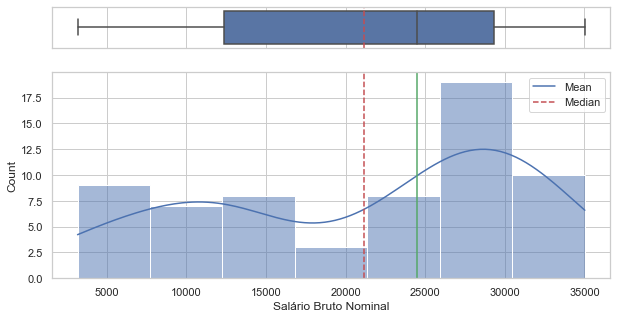

In [363]:
# df_median = df.loc[(df['cat_1']=='REITORIA') | (df['cat_1']=='FACULDADE DE ENGENHARIA ELETRICA E DE COMPUTACAO')]
df_median = df.loc[(df['cat_1']=='FACULDADE DE ENGENHARIA ELETRICA E DE COMPUTACAO')]
df_hue = df_median['cat_1']

f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(10,5))

mean=df_median['Salário Bruto Nominal'].mean()
median=df_median['Salário Bruto Nominal'].median()

sns.boxplot(x=df_median['Salário Bruto Nominal'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')

sns.histplot(data=df_median['Salário Bruto Nominal'],ax=ax_hist,kde=True)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

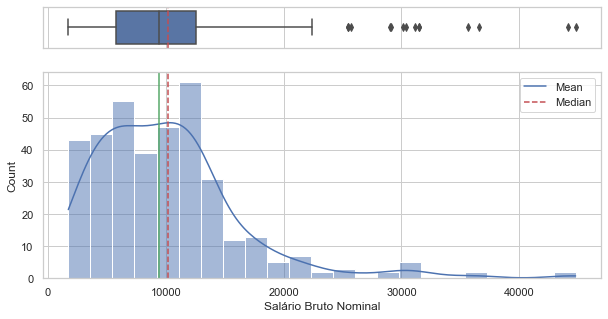

In [364]:
df_median = df.loc[(df['cat_1']=='REITORIA')]
df_hue = df_median['cat_1']

f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(10,5))

mean=df_median['Salário Bruto Nominal'].mean()
median=df_median['Salário Bruto Nominal'].median()

sns.boxplot(x=df_median['Salário Bruto Nominal'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')

sns.histplot(data=df_median['Salário Bruto Nominal'],ax=ax_hist,kde=True)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

<AxesSubplot:xlabel='Salário Bruto Nominal', ylabel='cat_1'>

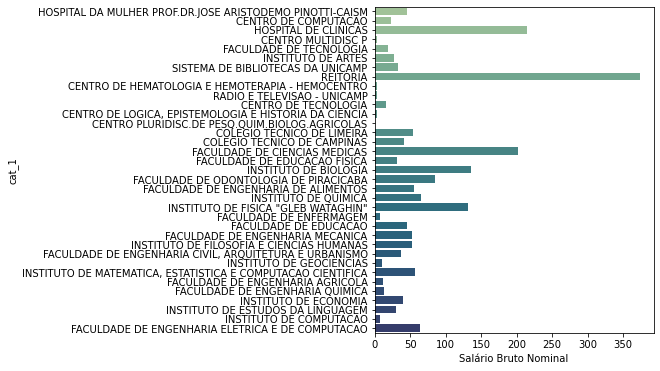

In [303]:
plt.subplots(figsize=(5,6))

df1 = df.groupby('cat_1').sum().sort_values('Salário Bruto Nominal').reset_index()      # Não ok. Com barras.
df2 = df.groupby('cat_1').mean().sort_values('Salário Bruto Nominal').reset_index()     # OK. Com barras. Em ordem
df3 = df.groupby('cat_1').median().sort_values('Salário Bruto Nominal').reset_index()   # Meio ok. Com barras. Meio em ordem
df4 = df.groupby('cat_1').count().sort_values('Salário Bruto Nominal').reset_index()    # Não ok. Com barras.
df5 = df.groupby('cat_1').mad().sort_values('Salário Bruto Nominal').reset_index()      # Não ok. Com barras. Meio em ordem
# df4
sns.barplot(x='Salário Bruto Nominal', y='cat_1', data=df4, order=df2['cat_1'], palette='crest')

In [42]:
df = data[['Cargo1','Salário Bruto Nominal']]

# df = df.sort_values(by=['Salário Bruto Nominal']).reset_index
result = df.groupby(['Cargo1'])['Salário Bruto Nominal'].aggregate(np.mean).reset_index().sort_values('Salário Bruto Nominal')

# g = sns.barplot(x='Cargo1',y='Salário Bruto Nominal',data=df, order=result['Cargo1'])
#g.set_xticklabels(g.get_xticklabels(), rotation=60, horizontalalignment='right')
#g.plot()
plt.subplots(figsize=(5, 10))
sns.barplot(y='Cargo1',x='Salário Bruto Nominal',data=df, order=result['Cargo1'],orient='h',palette='crest')

plt.savefig("Figures/salaries_category.jpeg")

KeyboardInterrupt: 

<AxesSubplot:xlabel='Salário Bruto Nominal', ylabel='Cargo2'>

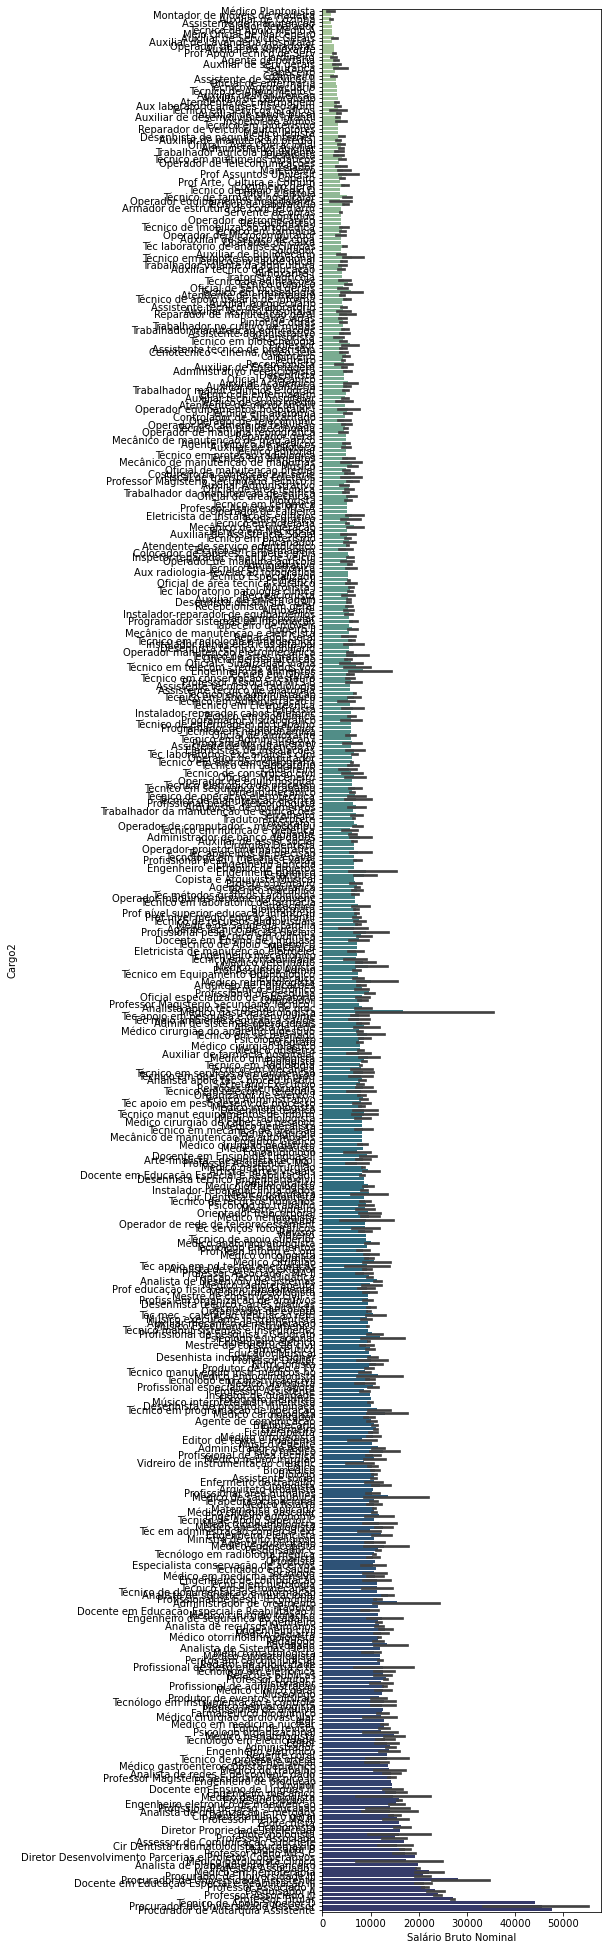

In [179]:
df = data[['Cargo2','Salário Bruto Nominal']]

result = df.groupby(['Cargo2'])['Salário Bruto Nominal'].aggregate(np.mean).reset_index().sort_values('Salário Bruto Nominal')

plt.subplots(figsize=(5, 35))
sns.barplot(y='Cargo2',x='Salário Bruto Nominal',data=df, order=result['Cargo2'],orient='h',palette='crest')

plt.savefig("Figures/salaries_all.jpeg")